# 一. Tensor

### 把Pytorch当做Numpy用

In [1]:
import torch
import numpy as np

In [2]:
# 创建一个numpy ndarray
numpy_tensor=np.random.randn(2,3)

我们可以使用**两种方式**将numpy的ndarray转换为torch的tensor
- `torch.Tensor(ndarray)`
- `torch.from_numpy(ndarray)`

In [4]:
pytorch_tensor1=torch.Tensor(numpy_tensor)
pytorch_tensor2=torch.from_numpy(numpy_tensor)
print(pytorch_tensor1)
print(pytorch_tensor2)

tensor([[ 0.5297, -0.8408,  0.2289],
        [-0.1271, -0.3156, -1.1515]])
tensor([[ 0.5297, -0.8408,  0.2289],
        [-0.1271, -0.3156, -1.1515]], dtype=torch.float64)


我们也可以使用**两种方式**将pytorch tensor转换为numpy ndarray.
- `pytorch_tensor.numpy()`
- `pytorch_tensor.cpu().numpy()`

要注意 GPU 上的 Tensor 不能直接转换为 NumPy ndarray，需要使用.cpu()先将 GPU 上的 Tensor 转到 CPU 上

In [5]:
# 如果pytorch tensor在cpu上
numpy_array=pytorch_tensor1.numpy()
# 如果pytorch tensor在gpu上
numpy_array2=pytorch_tensor1.cpu().numpy()
print(numpy_array)

[[ 0.5297042  -0.8408229   0.22885658]
 [-0.12708993 -0.3156194  -1.1515012 ]]


**Pytorch Tensor使用GPU加速**

我们可以使用**两种方式**将Tensor放到GPU上
- 第一种方式是定义cuda数据类型

In [7]:
dtype=torch.cuda.FloatTensor
gpu_tensor=torch.randn(2,3).type(dtype)
print(gpu_tensor)

tensor([[ 0.5909, -1.0085,  0.4924],
        [-0.3589,  1.1792,  1.1899]], device='cuda:0')


- 第二种方式更简单, `tensor.cuda()`, 直接将tensor放到GPU上,类型跟之前的保持一致

In [9]:
gpu_tensor = torch.randn(2,3).cuda(0) # 将 tensor 放到第一个 GPU 上
#gpu_tensor = torch.randn(10, 20).cuda(1) # 将 tensor 放到第二个 GPU 上, 因为我们只有一个GPU,所以我们注释掉这行代码
print(gpu_tensor)

tensor([[-0.9175, -1.6672,  1.3201],
        [ 1.0196,  0.6141, -0.5339]], device='cuda:0')


**Pytorch 将tensor放回CPU**

In [10]:
cpu_tensor=gpu_tensor.cpu()
print(cpu_tensor)

tensor([[-0.9175, -1.6672,  1.3201],
        [ 1.0196,  0.6141, -0.5339]])


**我们也能访问到Tensor的一些属性**

- 得到tensor的大小: `tensor.shape`, `tensor.size()`,注意`shape`后边没有括号,因为`shape`是`__init__`中的属性.

In [11]:
print(pytorch_tensor1.shape)
print(pytorch_tensor1.size())

torch.Size([2, 3])
torch.Size([2, 3])


- 得到tensor的数据类型: `tensor.type()`

In [12]:
print(pytorch_tensor1.type())

torch.FloatTensor


- 得到tensor的维度: `tensor.dim()`

In [13]:
print(pytorch_tensor1.dim())

2


- 得到tensor的所有元素的个数: `tensor.numel()`

In [14]:
print(pytorch_tensor1.numel())

6


**小练习**

创建一个类型是float64, 大小是3\*2,随机初始化的tensor,将其转化为numpy的ndarray,输出其数据类型 

In [15]:
mytensor=torch.randn(3,2).type(torch.DoubleTensor)
myarray=mytensor.numpy()
print(mytensor)
print(myarray.dtype)

tensor([[ 0.7166,  0.0612],
        [-0.9271,  0.4692],
        [ 0.0770, -1.2780]], dtype=torch.float64)
float64


#### 小结
Pytorch tensor的属性或方法:
- `tensor.numpy()`
- `tensor.cpu()`
- `tensor.shape`
- `tensor.size()`
- `tensor.dim()`
- `tensor.numel()`
- `tensor.type()`
- `tensor.cuda()`

### Tensor的操作
Tensor 操作中的 api 和 NumPy 非常相似，如果你熟悉 NumPy 中的操作，那么 tensor 基本是一致的，下面我们来列举其中的一些操作

#### `torch.ones()`生成全`1`tensor

In [30]:
x=torch.ones(2,2)
print(x)

tensor([[1., 1.],
        [1., 1.]])


#### `tensor.type()`得到tensor类型

In [31]:
print(x.type())

torch.FloatTensor


#### 转换tensor数据类型为整形: `tensor.long()`

In [33]:
x=x.long()
print(x)
print(x.type())

tensor([[1, 1],
        [1, 1]])
torch.LongTensor


#### 将整形tensor转换为float类型: `tensor.float()`

In [34]:
x=x.float()
print(x)
print(x.type())

tensor([[1., 1.],
        [1., 1.]])
torch.FloatTensor


#### 沿着行取最大值: `torch.max(tensor, dim=)`

In [37]:
x=torch.randn(4,3)
print(x)
max_value, max_idx=torch.max(x, dim=-1)
print(max_value, max_idx)

tensor([[ 1.6204, -0.4077, -1.3994],
        [-0.8982,  0.4406, -1.8149],
        [-0.8666,  1.0114, -0.7348],
        [ 2.0932, -2.4719, -0.3610]])
tensor([1.6204, 0.4406, 1.0114, 2.0932]) tensor([0, 1, 1, 0])


#### 沿着行对`x`求和: `torch.sum(tensor, dim=)`

In [38]:
sum_x=torch.sum(x,dim=1)
print(sum_x)

tensor([-0.1867, -2.2725, -0.5900, -0.7398])


#### 增加维度或者减少维度: `tensor.unsqueeze()`

In [39]:
print(x.shape)
x=x.unsqueeze(0) #在第一维度增加
print(x.shape)

torch.Size([4, 3])
torch.Size([1, 4, 3])


In [40]:
x=x.unsqueeze(1) #在第二维度增加
print(x.shape)

torch.Size([1, 1, 4, 3])


In [41]:
x=x.squeeze(0) #减少第一个维度
print(x.shape)

torch.Size([1, 4, 3])


In [43]:
x=x.squeeze() #将tensor中所有1维都删掉
print(x.shape)

torch.Size([4, 3])


#### 使用`permute`和`transpose`进行维度交换

In [44]:
x=torch.randn(3,4,5)
print(x.shape)

x=x.permute(1,0,2) #将第0维和第1维交换
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([4, 3, 5])


In [45]:
x=x.transpose(0,2) #将第0维和第2维交换
print(x.shape)

torch.Size([5, 3, 4])


#### 使用`view`对tensor进行reshape

In [46]:
x=torch.randn(3,4,5)
print(x.shape)

x=x.view(-1,5)
print(x.shape)

x=x.view(3,20)
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([12, 5])
torch.Size([3, 20])


#### 两个tensor求和: `torch.add(tensor1,tensor2)`或者`tensor1+tensor2`

In [47]:
x=torch.randn(3,4)
y=torch.randn(3,4)
z1=torch.add(x,y)
z2=x+y
print(z1)
print(z2)

tensor([[-0.4661,  0.0368, -3.1299, -0.4008],
        [ 1.9232, -0.9474,  1.1776,  3.5262],
        [-0.3276,  1.3257,  0.6753, -0.8982]])
tensor([[-0.4661,  0.0368, -3.1299, -0.4008],
        [ 1.9232, -0.9474,  1.1776,  3.5262],
        [-0.3276,  1.3257,  0.6753, -0.8982]])


#### pytorch大多数操作支持inplace原地操作,也就是直接对tensor进行操作而不需要开辟内存空间,方式非常简单,一般是在操作的符号后面加`_`,比如:
- `unsqueeze_(dim)`进行inplace操作:`unsqueeze_`

In [49]:
x=torch.ones(3,3)
print(x.shape)
#unsqueeze进行
x.unsqueeze_(0)
print(x.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])


- `transpose_(dim1,dim2)`进行inplace

In [50]:
x.transpose_(1,0)
print(x.shape)

torch.Size([3, 1, 3])


- `add_(tensor)`进行inplace

In [54]:
x=torch.ones(3,3)
y=torch.ones(3,3)
print(x)

x.add_(y)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


#### 小练习
创建一个float32, 4\*4的全为1的矩阵, 将矩阵中间2\*2的矩阵,全部修改为2

In [26]:
x=torch.ones(4,4).float()
x[1:3,1:3]=2
print(x)

tensor([[1., 1., 1., 1.],
        [1., 2., 2., 1.],
        [1., 2., 2., 1.],
        [1., 1., 1., 1.]])


#### 小结
Pytorch tensor或torch的方法:
- `torch.ones(shape)`
- `tensor.long()`
- `tensor.float()`
- `torch.max(tensor,dim)`
- `torch.sum(tensor,dim)`
- `tensor.unsqueeze(dim).`
- `tensor.squeeze(dim)`
- `tensor.permute(new_dim)` 
- `tensor.transpose(dim1,dim2)`
- `tensor.view(new_shape)`
- `tensor.add(tensor1,tensor2)`
- `tensor1+ tensor2`
- `tensor.unsqueeze_(dim)`
- `tensor.transpose_(dim)`
- `tensor_1.add_(tensor_2)`

# 二. Variable
tensor 是 PyTorch 中的完美组件，但是构建神经网络还远远不够，我们需要能够构建计算图的 tensor，这就是 **Variable**。

Variable 是对 tensor 的封装，操作和 tensor 是一样的，但是每个 Variabel都有三个属性:
- Variable 中的 tensor本身`.data`，
- 对应 tensor 的梯度`.grad`
- Variable 是通过什么方式得到的`.grad_fn`

注意: Variable(tensor)返回的依然是tensor类型.换句话说,tensor本身就带有`.data`,`.grad`,`grad_fn`三个属性.

#### 导入Variable

In [17]:
from torch.autograd import Variable

#### 将tensor变成Variable

In [27]:
x_tensor=torch.randn(2,3)
y_tensor=torch.randn(2,3)

x=Variable(x_tensor, requires_grad=True) #默认Variable是不需要求梯度的, 所以我们需要用这个方式申明需要对其进行求梯度
y=Variable(y_tensor, requires_grad=True)

#### 得到Variable的数值及获得方式: `tensor.data`,`tensor.grad_fn`

In [30]:
z=torch.sum(x+y) #不指定dim就把所有元素相加
z1=x+y

print(z.data)
print(z.grad_fn)
print(z1.data)
print(type(z1))

tensor(-0.5982)
tensor([[-2.1567, -1.9161,  1.4580],
        [ 0.5328,  0.1171,  1.3667]])
<class 'torch.Tensor'>


#### 得到Variable的梯度: `variable.grad`

In [31]:
#求x和y的梯度
z.backward()

print(x.data)
print(y.data)
print(x.grad)
print(y.grad)

tensor([[-0.1281, -0.2999,  1.1750],
        [-1.0195, -0.2167,  1.0767]])
tensor([[-2.0285, -1.6163,  0.2830],
        [ 1.5523,  0.3337,  0.2900]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


#### 小练习
尝试构建一个函数 $y=x^2$,然后求$x=2$的导数

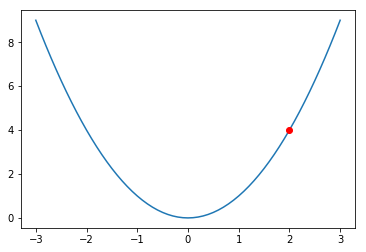

In [67]:
import matplotlib.pyplot as plt
x=np.arange(-3,3.01,0.1)
y=x**2
plt.plot(x,y)
plt.plot(2,4,'ro')
plt.show()

**答案**:

In [68]:
x=Variable(torch.FloatTensor([2]),requires_grad=True)
y=x**2
y.backward()
print(x.grad)

tensor([4.])
